# Smothing signals with median filter

In [1]:
from matplotlib import pyplot as plt
import mysignals as sigs
from scipy import signal
from matplotlib import style
import numpy as np 
%matplotlib inline
style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,8]
plt.rcParams.update({'font.size':15})

In [2]:
median_filtered = signal.medfilt(sigs.InputSignal_1kHz_15kHz)

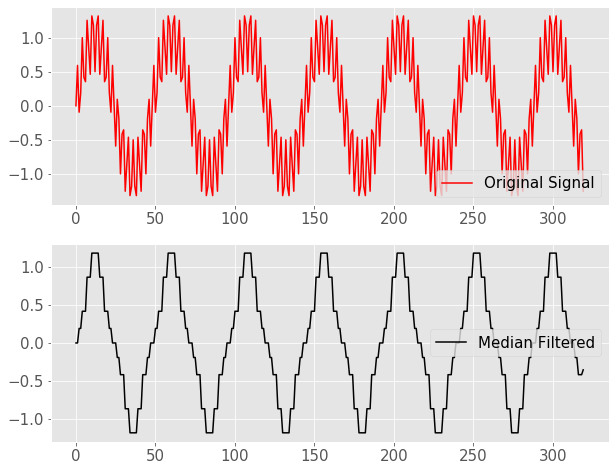

In [3]:
fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(sigs.InputSignal_1kHz_15kHz,color='r',LineWidth=1.5,label='Original Signal')
plt.legend()

plt.sca(axs[1])
plt.plot(median_filtered,color='k',LineWidth=1.5,label='Median Filtered')
plt.legend()
plt.show()

# FIR Filter Application

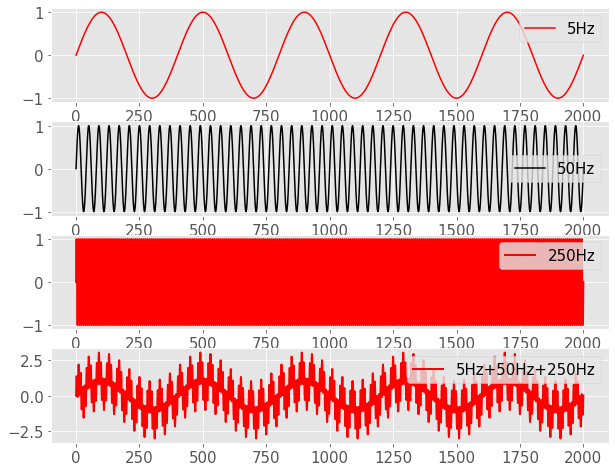

In [5]:
# Signal aaplying rate at 2000 Hz
t = np.linspace(0,1.0,2001)

sig_5Hz = np.sin(2*np.pi*5*t)
sig_50Hz = np.sin(2*np.pi*50*t)
sig_250Hz = np.sin(2*np.pi*250*t)

generated = sig_5Hz+sig_50Hz+sig_250Hz

fig,axs = plt.subplots(4,1)

plt.sca(axs[0])
plt.plot(sig_5Hz,color='r',LineWidth=1.5,label='5Hz')
plt.legend()

plt.sca(axs[1])
plt.plot(sig_50Hz,color='k',LineWidth=1.5,label='50Hz')
plt.legend()

plt.sca(axs[2])
plt.plot(sig_250Hz,color='r',LineWidth=2,label='250Hz')
plt.legend()

plt.sca(axs[3])
plt.plot(generated,color='r',LineWidth=2,label='5Hz+50Hz+250Hz')
plt.legend()

plt.show()

# Low Pass Filter

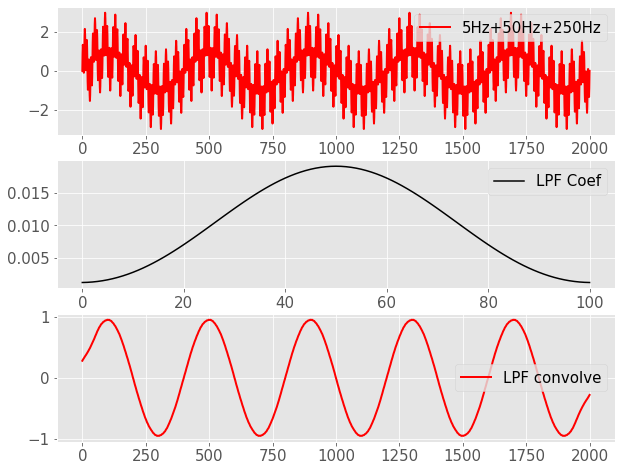

In [9]:
numtaps = 101
lpf_cutoff = 7
hpf_cutoff = 100

bp_cutoff1 = 40
bp_cutoff2 = 100

#lowpass Filter
lowpass_coef = signal.firwin(numtaps,lpf_cutoff,nyq=1000)
lpf_output = signal.convolve(generated,lowpass_coef,mode='same')

fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(generated,color='r',LineWidth=2,label='5Hz+50Hz+250Hz')
plt.legend()

plt.sca(axs[1])
plt.plot(lowpass_coef,color='k',LineWidth=1.5,label='LPF Coef')
plt.legend()

plt.sca(axs[2])
plt.plot(lpf_output,color='r',LineWidth=2,label='LPF convolve')
plt.legend()



plt.show()

# High Pass Filter

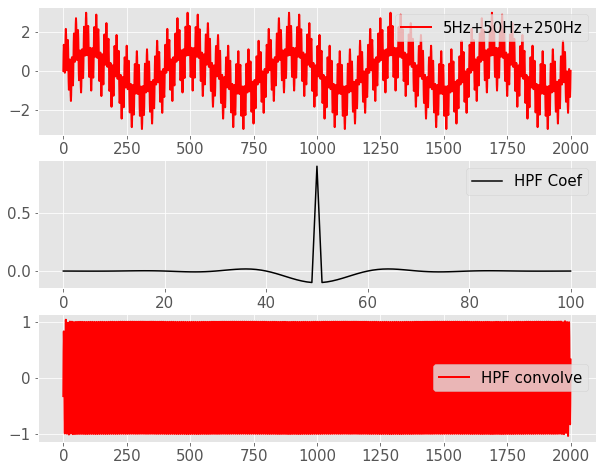

In [11]:
#highpass Filter
highpass_coef = signal.firwin(numtaps,hpf_cutoff,pass_zero=False,nyq=1000)
hpf_output = signal.convolve(generated,highpass_coef,mode='same')

fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(generated,color='r',LineWidth=2,label='5Hz+50Hz+250Hz')
plt.legend()

plt.sca(axs[1])
plt.plot(highpass_coef,color='k',LineWidth=1.5,label='HPF Coef')
plt.legend()

plt.sca(axs[2])
plt.plot(hpf_output,color='r',LineWidth=2,label='HPF convolve')
plt.legend()



plt.show()

# BanPass Filter

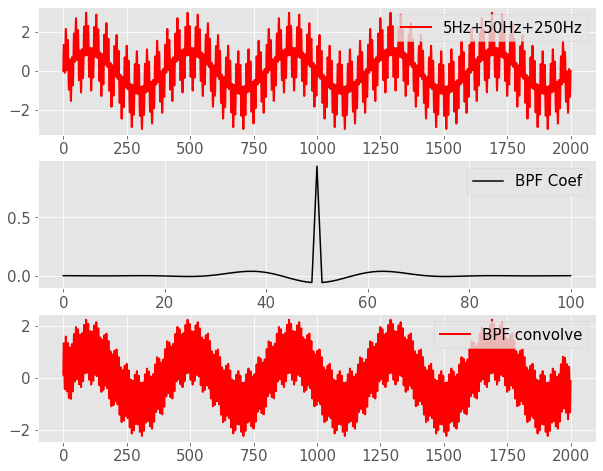

In [12]:
#lowpass Filter
bandpass_coef = signal.firwin(numtaps,[bp_cutoff1,bp_cutoff2],nyq=1000)
bpf_output = signal.convolve(generated,bandpass_coef,mode='same')

fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(generated,color='r',LineWidth=2,label='5Hz+50Hz+250Hz')
plt.legend()

plt.sca(axs[1])
plt.plot(bandpass_coef,color='k',LineWidth=1.5,label='BPF Coef')
plt.legend()

plt.sca(axs[2])
plt.plot(bpf_output,color='r',LineWidth=2,label='BPF convolve')
plt.legend()



plt.show()